In [2]:
import random
import multiprocessing

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def manipulate_plurality(rankings, manipulator_index, want_winner):
    candidates = rankings[0]    
    
    plurality_scores = {}
    for candidate in candidates:
        plurality_scores[candidate] = 0
        
    for index, ranking in enumerate(rankings):
        if index != manipulator_index:
                plurality_scores[ranking[0]] += 1  
    
    plurality_scores[want_winner] += 1
    
    winner_in_this_ranking = min(plurality_scores, key=lambda k: (-plurality_scores[k], k))

    return winner_in_this_ranking == want_winner
    

In [4]:
def manipulate_borda(rankings, manipulator_index, want_winner):
    candidates = rankings[0]    
    
    borda_scores = {}
    for candidate in candidates:
        borda_scores[candidate] = 0
        
    for index, ranking in enumerate(rankings):
        if index != manipulator_index:
            for i in range(len(ranking)):
                borda_scores[ranking[i]] += len(ranking) - i - 1        
    
    borda_scores[want_winner] += len(rankings[0]) - 1
    candidates_left = candidates.copy()
    candidates_left.remove(want_winner)
    
    for i in range(1, len(rankings[0])):
        for candidate in candidates_left:
            if borda_scores[candidate] + len(rankings[0]) - i - 1 < borda_scores[want_winner]:
                borda_scores[candidate] += len(rankings[0]) - i - 1
                candidates_left.remove(candidate)
                break
            elif borda_scores[candidate] + len(rankings[0]) - i - 1 == borda_scores[want_winner]:
                if candidate > want_winner:
                    borda_scores[candidate] += len(rankings[0]) - i - 1
                    candidates_left.remove(candidate)
                    break
            else:
                return False
    
    return True    
    

In [5]:
def manipulate_copeland(rankings, manipulator_index, want_winner):
    pass

# Need to think about this


In [6]:
def get_winner_plurality(rankings):
    # print("Inside Runner")
    candidates = rankings[0]
    # print(candidates)
    # print(rankings)
    
    pluralities = {candidate: 0 for candidate in candidates}
    for iter, ranking in enumerate(rankings):
        pluralities[ranking[0]] += 1
    
    winner_in_this_ranking = min(pluralities, key=lambda k: (-pluralities[k], k))
    
    # print(pluralities)
    # print(winner_in_this_ranking)
    
    return winner_in_this_ranking

In [7]:
def generate_random_ranking(number_of_voters, number_of_candidates):
    candidates = list(range(number_of_candidates))
    rankings = []
    for _ in range(number_of_voters):
        random.shuffle(candidates)
        rankings.append(candidates.copy())
    return rankings

In [8]:
def manipulate_instance(number_of_voters, number_of_candidates):
    
    number_of_manipulations_total = 0
    number_of_people_able_to_manipulate = 0
    
    random_ranking = generate_random_ranking(number_of_voters, number_of_candidates)
    plurality_winner_here = get_winner_plurality(random_ranking)

    for index_which_will_manipulate in range(number_of_voters):
        
        this_index_manipualted = False
        
        his_ranking_of_the_winner = random_ranking[index_which_will_manipulate].index(plurality_winner_here)
        for which_one_wins_index in range(his_ranking_of_the_winner):
            which_one_wins = random_ranking[index_which_will_manipulate][which_one_wins_index]
            if manipulate_plurality(random_ranking, index_which_will_manipulate, which_one_wins):
                number_of_manipulations_total += 1
                this_index_manipualted = True
        
        number_of_people_able_to_manipulate += this_index_manipualted
    
    return (number_of_manipulations_total, number_of_people_able_to_manipulate)
                
        

In [9]:
number_of_voters = 5
number_of_candidates = 3

manipulations_possible_data = []

In [10]:
rrr = generate_random_ranking(number_of_voters, number_of_candidates)
print(rrr)
plurality_winner_here = get_winner_plurality(rrr)
print(plurality_winner_here)

[[0, 1, 2], [2, 0, 1], [0, 2, 1], [0, 1, 2], [0, 2, 1]]
0


In [11]:
num_runs = 1000

with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
    results = pool.starmap(manipulate_instance, [(number_of_voters, number_of_candidates)] * num_runs) 

results_1st_element = [result[0] for result in results]
results_2nd_element = [result[1] for result in results]



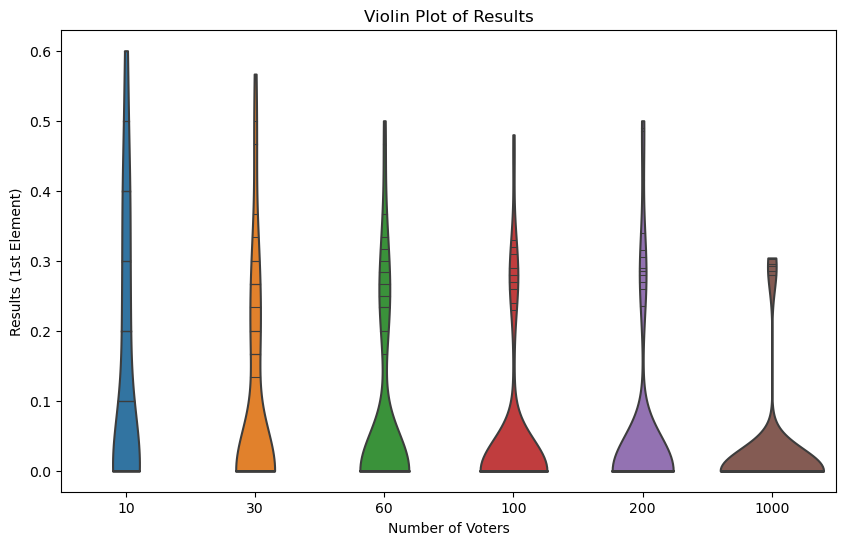

In [13]:
num_runs = 100

# Define a range of number_of_voters values
# voter_values = range(10, 101, 10)
# print(voter_values)
# exit()

voter_values = [10, 30, 60, 100, 200, 1000]

# Initialize lists to store results for each value of number_of_voters
results_1st_element = []
results_2nd_element = []

results_all = []
hue_data = []

# Create a multiprocessing pool for parallel execution
with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
    for voters in voter_values:
        results = pool.starmap(manipulate_instance, [(voters, 5)] * num_runs)
        results_1st_element.append([result[0]/voters for result in results])
        results_2nd_element.append([result[1]/voters for result in results])
# Create a violin plot for the collected results

plt.figure(figsize=(10, 6))
sns.violinplot(data=results_2nd_element, inner="stick" ,cut=0)
plt.xticks(range(len(voter_values)), voter_values)
plt.xlabel("Number of Voters")
plt.ylabel("Results (1st Element)")
plt.title("Violin Plot of Results")
plt.show()